## <center>Predict whether the Employee of an Organization should get Promotion or Not?</center>
Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion.

In this project, we will evaluate the performance and predictive power of the model that has trained on the data collected from the organization. The model trained on this data will be used to predict the employees who are likely to get promoted.

In [ ]:
#Importing all libraries

#For mathematical operations
import numpy as np
#For dataframe operations
import pandas as pd

#For machine learning
import sklearn
import imblearn

#For data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#setting up size of the figures
plt.rcParams['figure.figsize'] = (15, 5)
#setting up the style of the plot
plt.style.use('fivethirtyeight')

### Reading the datasets
 - There are 2 datasets i.e. training dataset and test dataset
 - Training dataset will be used to traing the Machine learning model
 - After learning the patterns from the testing datasets, we will predict the target variable.
 

In [2]:
# reading the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# Checking the shape of the datasets
print('Shape of training dataset : ', train.shape)
print('Shape of testing dataset : ', test.shape)

Shape of training dataset :  (54808, 14)
Shape of testing dataset :  (23490, 13)


In [4]:
# Checking the columns in the training dataset
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [5]:
# Checking the columns in the testing dataset
test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [6]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


 #### Descriptive Analysis of the data

In [7]:
# Checking descriptive analysis for continuous variables
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [8]:
# Checking descriptive analysis for Categorical columns
train.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


### Analysing target class balance
 We will check the class balance of the target data. If its imbalanced then we will have to do some resampling techniques to make the data suitable for predictive analysis.

In [9]:
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

##### We will do Visualization of the data to better understand the imbalance

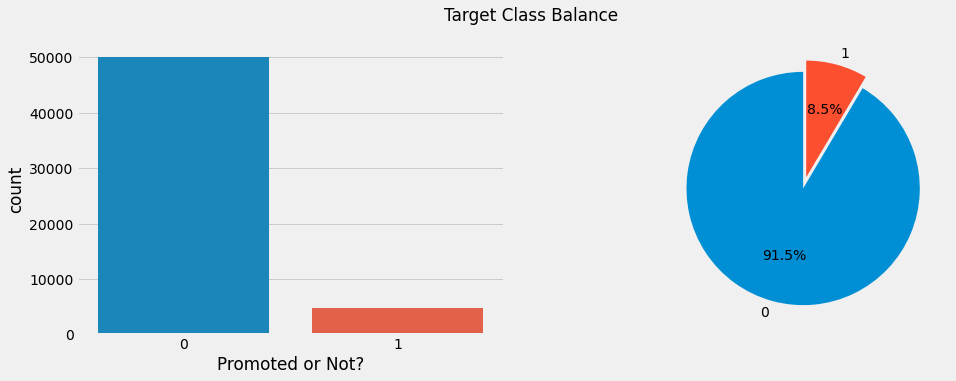

In [10]:
plt.subplot(1,2,1)
sns.countplot(data = train, x = 'is_promoted')
plt.xlabel('Promoted or Not?')

plt.subplot(1,2,2)
train['is_promoted'].value_counts().plot(kind='pie',startangle=90, autopct='%1.1f%%', explode=[0,0.1])

plt.axis('off')
plt.suptitle('Target Class Balance')
plt.show()

We see that the Target Class is highly imbalanced. Most of the times when we use machine learning models with imbalanced classes we get results which are biased towards the class having higher distribution. So we must use Resampling techniques to balance these Target class values.

##  Missing values treatment

In [11]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [12]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [13]:
# Lets check the missing values and its percentge in Train and Test datasets
train_MV_total = train.isnull().sum()
train_MV_percent = ((train_MV_total/train.shape[0])*100).round(1)

test_MV_total = test.isnull().sum()
test_MV_percent = ((test_MV_total/test.shape[0])*100).round(1)

missing_data = pd.concat([train_MV_total,train_MV_percent,test_MV_total,test_MV_percent],
                         keys=['Train_MV_Total','Train_MV_Percent','Test_MV_Total','Test_MV_Percent'],
                         axis=1)
missing_data

,Train_MV_Total,Train_MV_Percent,Test_MV_Total,Test_MV_Percent
employee_id,0,0.0,0.0,0.0
department,0,0.0,0.0,0.0
region,0,0.0,0.0,0.0
education,2409,4.4,1034.0,4.4
gender,0,0.0,0.0,0.0
recruitment_channel,0,0.0,0.0,0.0
no_of_trainings,0,0.0,0.0,0.0
age,0,0.0,0.0,0.0
previous_year_rating,4124,7.5,1812.0,7.7
length_of_service,0,0.0,0.0,0.0


We see that there are missing values in 'education' and 'previous_year_rating' columns in training and test data both. Also, the percentage of the missing values in 4% and 7% respectively. So we need not delete these missing values but we will impute the values using Mean, Median and Mode

As these columns are Categorical columns and there are no Outliers in the data, we will use the Mode values to impute the missing values 

In [14]:
#Imputing the missing values for Training data
train['education'] = train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

print('Number of missing values in Training data : ', train.isnull().sum().sum())

Number of missing values in Training data :  0


In [15]:
#Imputing the missing values for Testing data
test['education'] = test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])

print('Number of missing values in Testing data : ', test.isnull().sum().sum())

Number of missing values in Testing data :  0


## Checking for Outliers in the data

In [16]:
#We will check all the Numerical variables
train.select_dtypes(['int64','float']).head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


Looking at the data we can conclude that 'length_of_service', 'avg_training_score' can have outliers in them. Now let us find these by visualizing them.

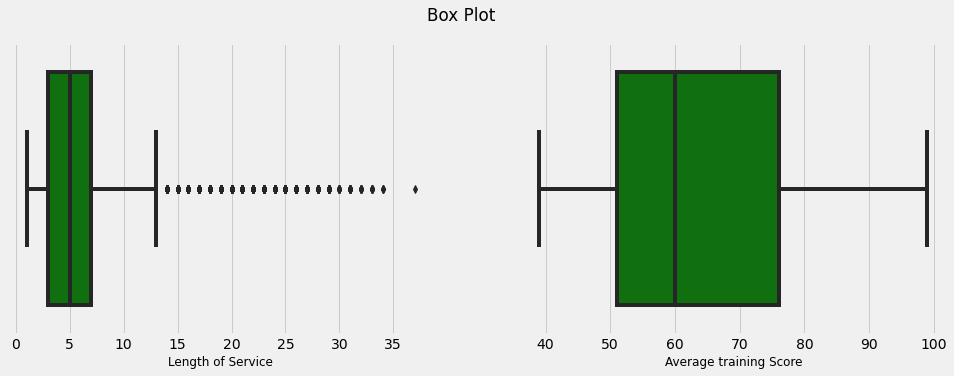

In [17]:
plt.subplot(1,2,1)
sns.boxplot(x = train['length_of_service'],color='green')
plt.xlabel('Length of Service', fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(x = train['avg_training_score'], color='green')
plt.xlabel('Average training Score', fontsize=12)

plt.suptitle('Box Plot')
plt.show()

We can see that there are no outliers in avg_training_score column but in length_of_service column there are some outliers after the Max value which we will remove.

In [18]:
train = train[train['length_of_service'] < 13]
train.shape

(50632, 14)

## Exploratory Data Analysis /Statistical Analysis

## - Univariate Analysis

* This is an Essential step, to understand the variables present in the dataset one by one.
* First, we will check the Univariate Analysis for Numerical Columns to check for Outliers by using Box plots.
* Then, we will use Distribution plots to check the distribution of the Numerical Columns in the Dataset.
* After that we will check the Univariate Analysis for Categorical Columns using Pie charts, and Count plots.
* We Use Pie charts, when we have very few categories in the categorical column, and we use count plots we have more categorises in the dataset.

In [19]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [20]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [21]:
train['recruitment_channel'].value_counts()

other       28106
sourcing    21430
referred     1096
Name: recruitment_channel, dtype: int64

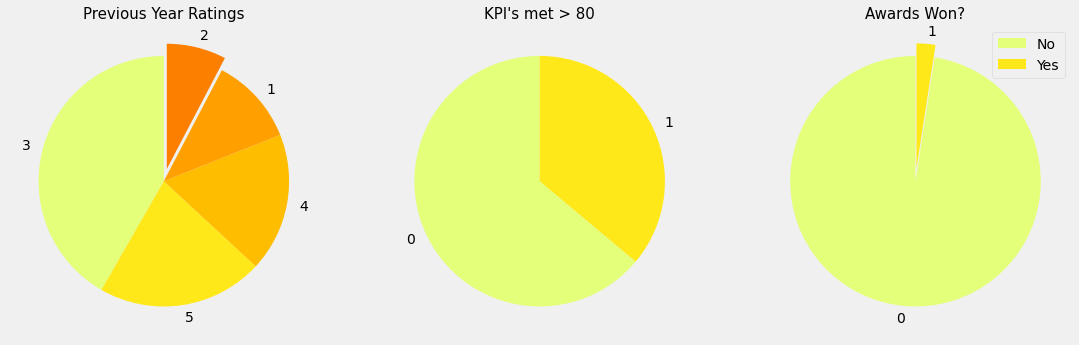

In [22]:
# We will plot Pie chart for columns having fewer categories - 
#'previous_year_rating','KPIs_met >80%', 'awards_won?'

plt.rcParams['figure.figsize'] = (17,6)
plt.subplot(1,3,1)
labels = ['3', '5', '4', '1', '2']
data = train['previous_year_rating'].value_counts()
explode = [0, 0, 0, 0, 0.1]
cmap = plt.cm.Wistia(np.linspace(0, 1, 5))
#train['previous_year_rating'].value_counts().plot(kind='pie',startangle=90 , autopct='%1.1f%%', explode=[0,0.1,0,0,0])
plt.pie(data, labels = labels, explode = explode, startangle = 90, colors = cmap)
plt.title('Previous Year Ratings', fontsize = 15)

plt.subplot(1,3,2)
labels = ['0','1']
data = train['KPIs_met >80%'].value_counts()
explode = [0, 0]
cmap = plt.cm.Wistia(np.linspace(0, 1, 5))
plt.pie(data, labels=labels, explode = explode,startangle = 90,colors = cmap)
plt.title("KPI's met > 80", fontsize = 15)

plt.subplot(1,3,3)
labels = ['0','1']
data = train['awards_won?'].value_counts()
explode = [0, 0.1]
cmap = plt.cm.Wistia(np.linspace(0, 1, 5))
plt.pie(data, labels=labels, explode = explode,startangle = 90,colors = cmap)
plt.title("Awards Won?", fontsize = 15)

plt.legend(['No', 'Yes'])
plt.show()


In the above pie chart we are checking the 'Previous years ratings.'KPI's met > 80' and 'Awards Won'.
From the above pattern we can see that only few employees have met 80% of KPI.
We can see that employees have very low rating previous year and less than 2% of employees have won Awards for their work.

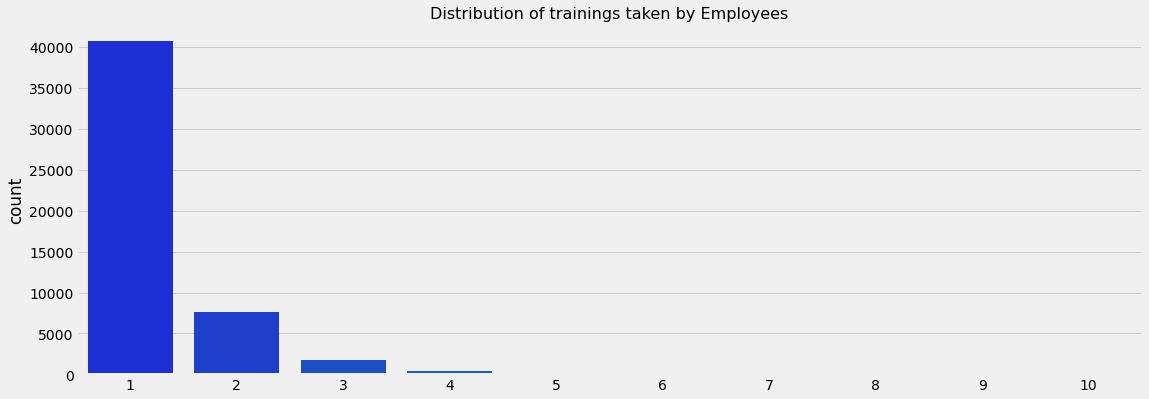

In [23]:
#we will visualize 'no_of_trainings' using count plot bcos it has more number of categories
sns.countplot(data = train, x = 'no_of_trainings', palette = 'winter')
plt.xlabel('')
plt.title('Distribution of trainings taken by Employees', fontsize = 16)
plt.show()


In the above plot we are checking the distribution of trainings undertaken by the employee. We can see that 80% of employees have undergone training only once and negligible no. of employees who took training more than 3.

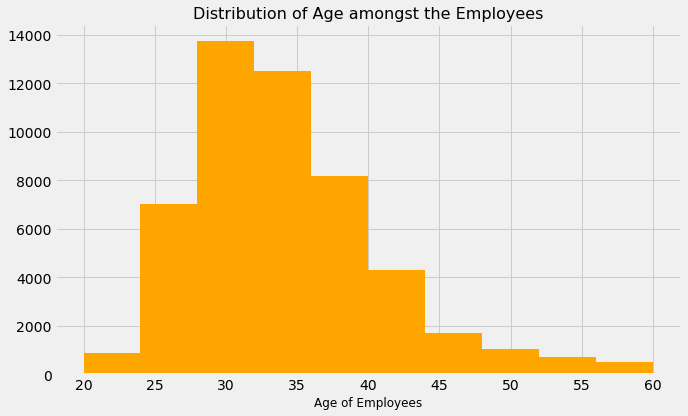

In [24]:
# We will use histogram to check the distribution of age among the employees
plt.rcParams['figure.figsize'] = (10, 6)
data = train['age']
plt.hist(data, color = 'orange')
plt.xlabel('Age of Employees', fontsize = 12)
plt.title('Distribution of Age amongst the Employees', fontsize = 16)
plt.show()

We can see from above plot that most of the employees are in the age rangnh from 25-45 years.

Text(0, 0.5, 'Department Name')

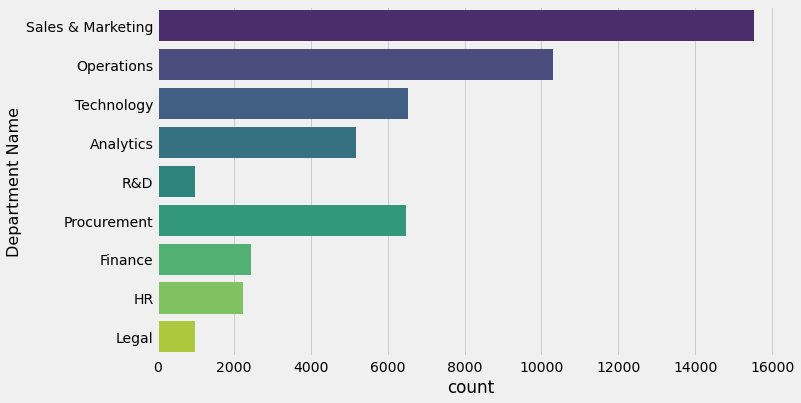

In [25]:
#Lets check employees in different departments
sns.countplot(data = train, y='department', orient = 'v', palette = 'viridis')
plt.ylabel('Department Name', fontsize = 16)

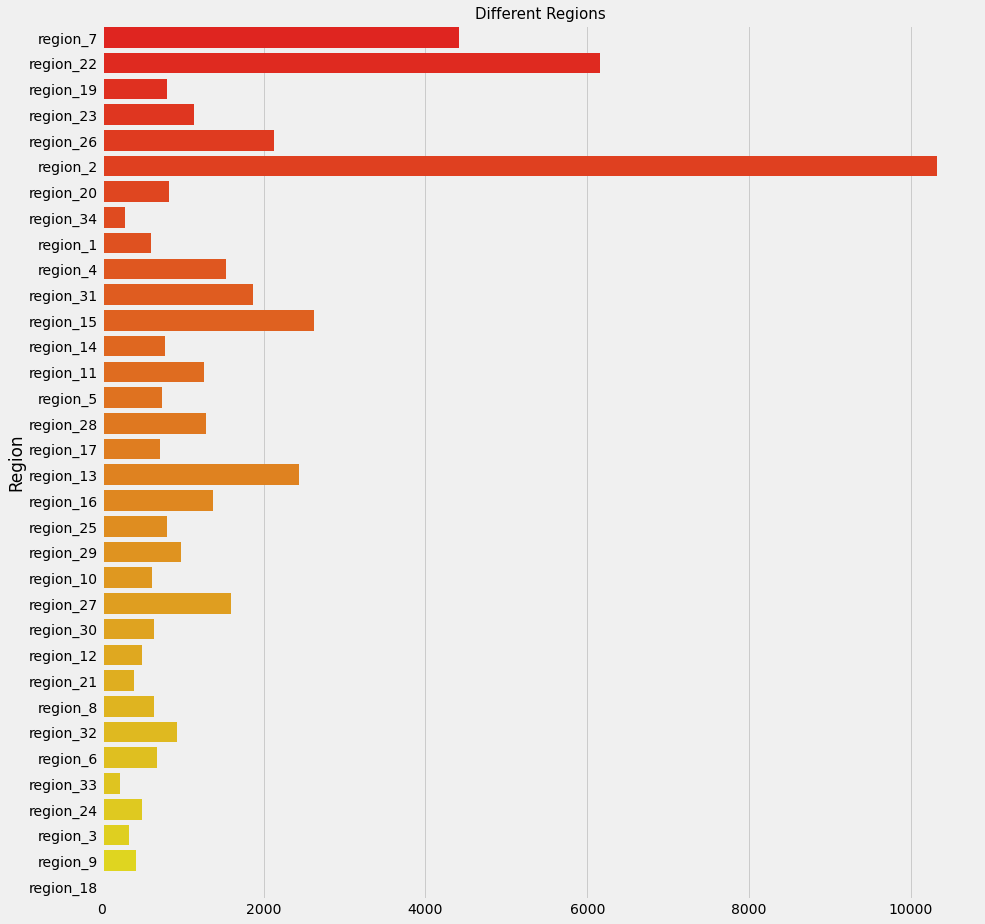

In [26]:
# Lets check the region count for all employees
plt.rcParams['figure.figsize'] = (14, 15)
sns.countplot(data = train, y = 'region', orient = 'v', palette = 'autumn')
plt.ylabel('Region')
plt.xlabel('')
plt.title('Different Regions', fontsize = 15)
plt.show()

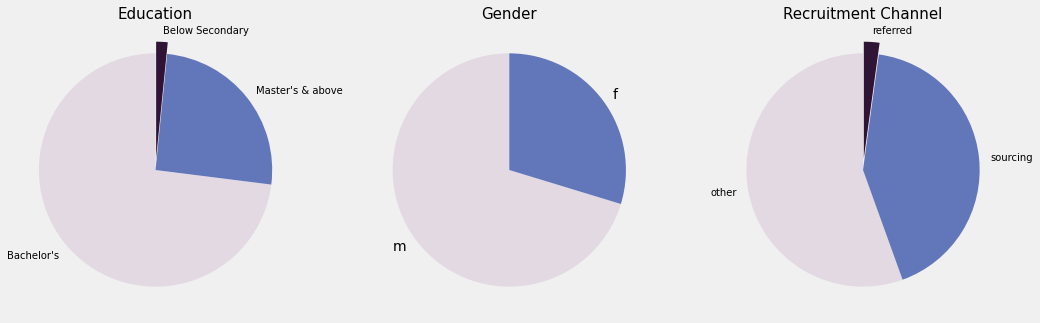

In [27]:
#Lets plot 'education', 'gender','recruitment_channel' using pie charts
plt.rcParams['figure.figsize'] = (16, 5)

plt.subplot(1,3,1)
data = train['education'].value_counts()
labels = train['education'].value_counts().index
cmap = plt.cm.twilight(np.linspace(0, 1, 5))
textprops = {"fontsize":10}
explode = [0.0,0.0,0.1]
plt.pie(data, labels=labels,startangle = 90,colors = cmap,textprops = textprops, explode = explode)
plt.title('Education', fontsize=15)

plt.subplot(1,3,2)
data = train['gender'].value_counts()
labels = train['gender'].value_counts().index
cmap = plt.cm.twilight(np.linspace(0,1,5))
textprops = {"fontsize":14}
explode = [0.0,0.0]
plt.pie(data, labels=labels,startangle = 90,colors = cmap,textprops = textprops, explode = explode)
plt.title('Gender', fontsize=15)

plt.subplot(1,3,3)
data = train['recruitment_channel'].value_counts()
labels = train['recruitment_channel'].value_counts().index
cmap = plt.cm.twilight(np.linspace(0,1,5))
textprops = {"fontsize":10}
explode = [0.0,0.0,0.1]
plt.pie(data, labels=labels,startangle = 90,colors = cmap,textprops = textprops, explode = explode)
plt.title('Recruitment Channel', fontsize=15)


plt.show()

## Bivariate Analysis

Bivariate analysis is the simplest form of quantitative analysis to find relationship between two set of values

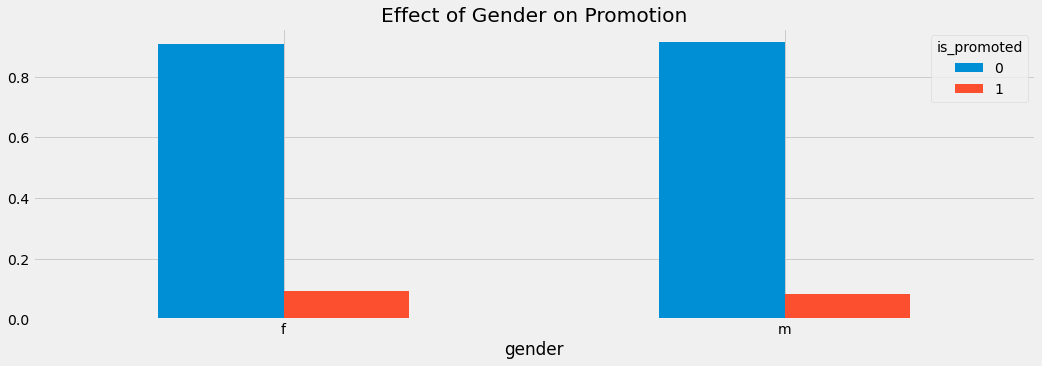

In [28]:
gender_total = pd.crosstab(train['gender'], train['is_promoted'])
gender_percent = gender_total.div(gender_total.sum(1),axis = 'rows')
gender_percent.plot(kind = 'bar', stacked=False)
plt.title("Effect of Gender on Promotion")
plt.xticks(rotation = 0)
plt.show()

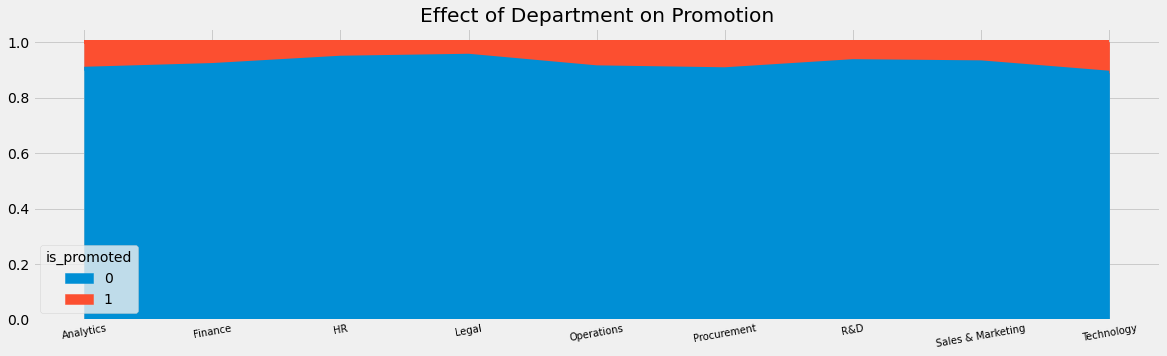

In [29]:
# Lets analyse effects of Department on Promotion.
plt.rcParams['figure.figsize'] = (18, 5)
x = pd.crosstab(train['department'], train['is_promoted'])
x.div(x.sum(1), axis='rows').plot(kind='area', stacked=True)
plt.xticks(fontsize = 10, rotation = 10)
plt.xlabel('')
plt.title('Effect of Department on Promotion')
plt.show()

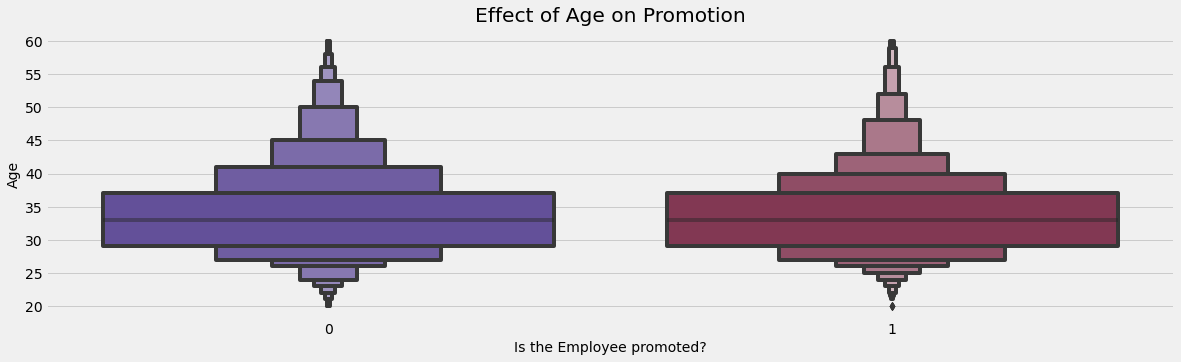

In [30]:
# Lets check effect of Age on Promotion
x = pd.crosstab(train['age'], train['is_promoted'])
sns.boxenplot(x = train['is_promoted'], y = train['age'], palette = 'twilight')
plt.xlabel('Is the Employee promoted?', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.title('Effect of Age on Promotion')
plt.show()

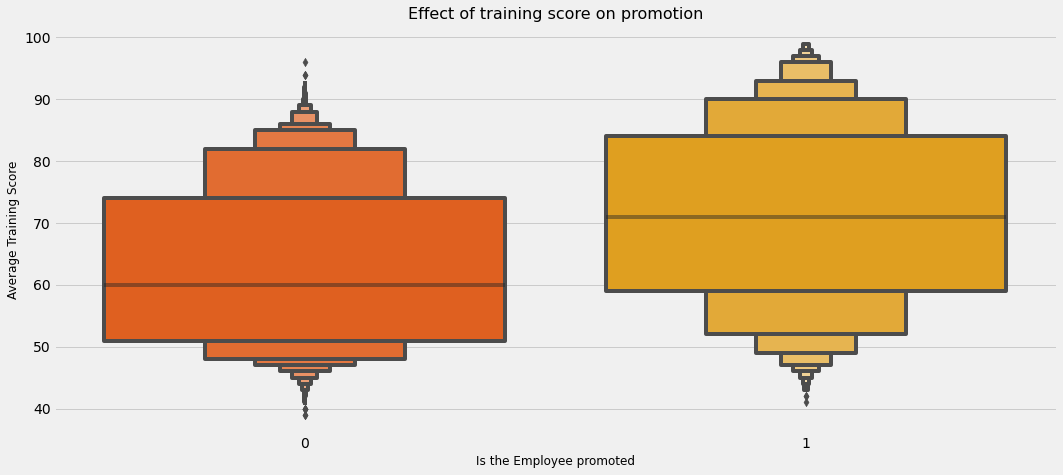

In [31]:
# Lets check the effect of training score on promotion
plt.rcParams['figure.figsize'] = (16, 7)
sns.boxenplot(x=train['is_promoted'], y=train['avg_training_score'], palette = 'autumn')
plt.ylabel('Average Training Score', fontsize = 12)
plt.xlabel('Is the Employee promoted', fontsize=12)
plt.title('Effect of training score on promotion', fontsize = 16)
plt.show()

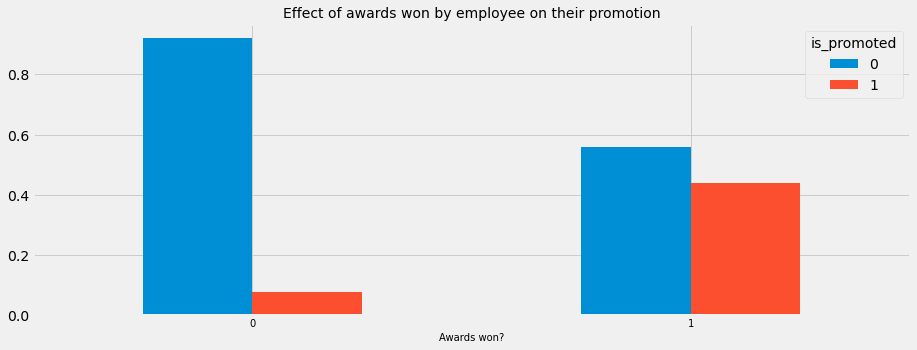

In [32]:
plt.rcParams['figure.figsize'] = (14, 5)
x = pd.crosstab(train['awards_won?'], train['is_promoted'])
x.div(x.sum(1),axis='rows').plot(kind='bar')
plt.xticks(fontsize = 10,rotation = 0)
plt.xlabel('Awards won?', fontsize = 10)
plt.title('Effect of awards won by employee on their promotion', fontsize = 14)
plt.show()

## Multivariate Analysis

Multivariate analysis is based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time.

* First, we will use the Correlation Heatmap to check the correlation between the Numerical Columns
* Then we will check the ppscore or the Predictive Score to check the correlation between all the columns present in the data.
* Then, we will use Bubble Charts, split Violin plots, Hue with Bivariate Plots.

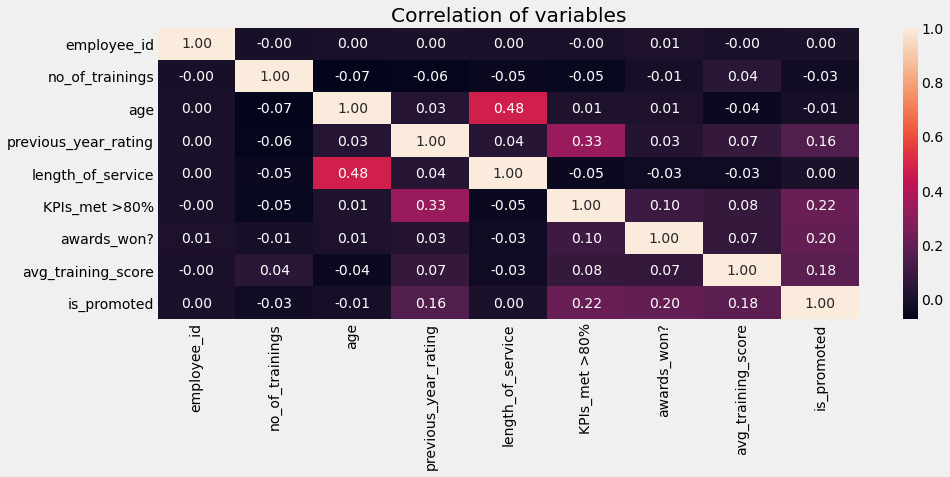

In [33]:
#Let's check the correlation between all the variables
sns.heatmap(train.corr(), annot = True, fmt='0.2f')
plt.title('Correlation of variables')
plt.show()

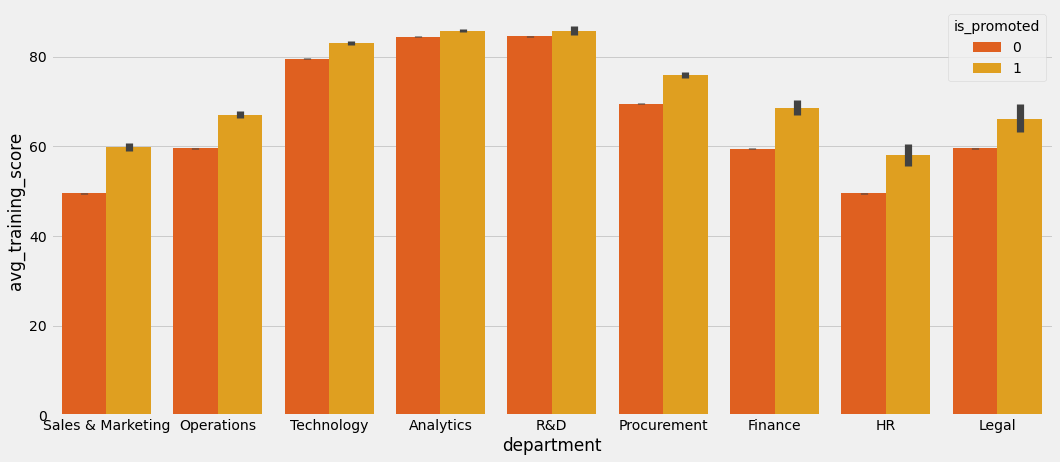

In [34]:
plt.rcParams['figure.figsize'] = (16, 7)
sns.barplot(x=train['department'], y=train['avg_training_score'], hue = train['is_promoted'], palette = 'autumn')
plt.show()

## Feature Engineering
Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques.

In the given dataset we will create 2 new columns using existing columns.
 * total_metrics = previous_year_rating + KPIs_met>80% + awards_won?
 * total_trainings_ratings = no_of_trainings*avg_training_score

In [35]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [36]:
# Let's create new columns from existing columns

#Creating total metrics for train and test data
train['total_metrics'] = train['previous_year_rating']+train['KPIs_met >80%']+train['awards_won?']
test['total_metrics'] = test['previous_year_rating']+ test['KPIs_met >80%']+test['awards_won?']

#Creating total for trainings for train and test
train['total_trainings_ratings'] = train['no_of_trainings'] * train['avg_training_score']
test['total_trainings_ratings'] = test['no_of_trainings'] * test['avg_training_score']

In [37]:
#Let's remove some columns which are not useful for promotion predictions

# We will remove employee_id, region, recruitment_channel as they do not have much impact
# on promotion column

train = train.drop(['employee_id', 'region', 'recruitment_channel'],axis = 1)
test = test.drop(['employee_id', 'region', 'recruitment_channel'],axis = 1)

train.columns

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted', 'total_metrics',
       'total_trainings_ratings'],
      dtype='object')

## Dealing with Categorical variables

In [38]:
train.select_dtypes(include=['object']).columns

Index(['department', 'education', 'gender'], dtype='object')

In [39]:
train['department'].value_counts()

Sales & Marketing    15519
Operations           10297
Technology            6520
Procurement           6463
Analytics             5187
Finance               2447
HR                    2226
Legal                  988
R&D                    985
Name: department, dtype: int64

In [40]:
train['education'].value_counts()

Bachelor's          36965
Master's & above    12862
Below Secondary       805
Name: education, dtype: int64

In [41]:
train['gender'].value_counts()

m    35592
f    15040
Name: gender, dtype: int64

In [42]:
#Let's start encoding the categorical columns
# We will use label encoder for 'department' and 'gender' columns. 
# We will encode education column on degree of importance.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train['department'] = le.fit_transform(train['department'])
test['department'] = le.fit_transform(test['department'])

train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.fit_transform(test['gender'])

order_label = {"Master's & above" : 3, "Bachelor's":2, "Below Secondary" : 1}

train['education'] = train['education'].map(order_label)
test['education'] = test['education'].map(order_label)

In [43]:
train.select_dtypes('object').columns
test.select_dtypes('object').columns

Index([], dtype='object')

In [44]:
#Lets check data after encoding
train.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,total_metrics,total_trainings_ratings
0,7,3,0,1,35,5.0,8,1,0,49,0,6.0,49
1,4,2,1,1,30,5.0,4,0,0,60,0,5.0,60
2,7,2,1,1,34,3.0,7,0,0,50,0,3.0,50
3,7,2,1,2,39,1.0,10,0,0,50,0,1.0,100
4,8,2,1,1,45,3.0,2,0,0,73,0,3.0,73


## Splitting of Dataset
We need to split the dataset to seperate the Target Column and Independent Columns
 * We will store the traget variable in a variable y and rest columns in x
 * We wil store test data y_test


In [45]:
#Lets split the train dataset
y = train['is_promoted']
x = train.drop(['is_promoted'], axis = 1)
x_test = test

#Let's see the shape of these datasets
print('Shape of x : ', x.shape)
print('Shape of y : ', y.shape)
print('Shape of x_test : ', x_test.shape)

Shape of x :  (50632, 12)
Shape of y :  (50632,)
Shape of x_test :  (23490, 12)


## Resampling
As we priviously saw that the target class has imbalanced data. so we need to do use synthetic resampling technique to balance the imbalanced data.
Here we will use the over sampling method. We will not use under sampling as it will lwad to loss of data.

In [46]:
#We will use SMOTE algorithm to resample the data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
x_resample, y_resample = sm.fit_resample(x,y)

In [47]:
# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(92504, 12)
(92504,)


In [48]:
print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
print(y_resample.value_counts())

Before Resampling :
0    46252
1     4380
Name: is_promoted, dtype: int64
After Resampling :
0    46252
1    46252
Name: is_promoted, dtype: int64


In [49]:
# lets create a validation set from the training data so that we can check whether the model that we have created is good enough
# lets import the train_test_split library from sklearn to do that

from sklearn.model_selection import train_test_split

x_train,x_valid,y_train,y_valid = train_test_split(x_resample,y_resample, test_size=0.2, random_state=0)

#Let's print the shapes 
print('Shape of x train ', x_train.shape)
print('Shape of y train ', y_train.shape)
print('Shape of x valid ', x_valid.shape)
print('Shape of y valid ', y_valid.shape)
print('Shape of x test ', x_test.shape)

Shape of x train  (74003, 12)
Shape of y train  (74003,)
Shape of x valid  (18501, 12)
Shape of y valid  (18501,)
Shape of x test  (23490, 12)


## Feature Scaling

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step

In [50]:
#Let's scaled all the features of the dataset to a same scale.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)

## Building predictive modelling

 * We will use Decision Tree algorith to build our predictive model and check its accuracy

In [51]:
#We import DecisionTreeClassifier and train the model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

classifier.fit(x_train,y_train)

#Let's predict the values from validation data
y_pred = classifier.predict(x_valid)

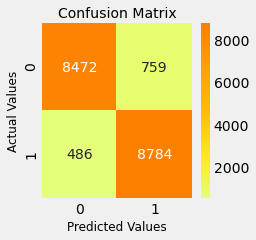

In [52]:
#Let's check the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

cm = confusion_matrix(y_valid,y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted Values',fontsize = 12)
plt.ylabel('Actual Values', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 14)
plt.show()

In [53]:
# Let's check the classification report

print("Accuracy Score : " , accuracy_score(y_valid,y_pred), "\n")
print("Classification report - \n\n", classification_report(y_valid,y_pred))

Accuracy Score :  0.9327063401978272 

Classification report - 

               precision    recall  f1-score   support

           0       0.95      0.92      0.93      9231
           1       0.92      0.95      0.93      9270

    accuracy                           0.93     18501
   macro avg       0.93      0.93      0.93     18501
weighted avg       0.93      0.93      0.93     18501



In [54]:
# Let's build a predictive model using Ramdom Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train,y_train)

y_pred_rf = rf_classifier.predict(x_valid)

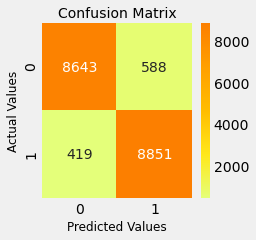

In [55]:
#Let's check the confusion matrix
cm = confusion_matrix(y_valid,y_pred_rf)

sns.heatmap(cm, cmap='Wistia', annot = True, fmt = '.8g')
plt.xlabel('Predicted Values',fontsize = 12)
plt.ylabel('Actual Values', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 14)
plt.show()

In [56]:
# Let's check the classification report

print("Accuracy Score : " , accuracy_score(y_valid,y_pred_rf), "\n")
print("Classification report - \n\n", classification_report(y_valid,y_pred_rf))

Accuracy Score :  0.9455705097021783 

Classification report - 

               precision    recall  f1-score   support

           0       0.95      0.94      0.94      9231
           1       0.94      0.95      0.95      9270

    accuracy                           0.95     18501
   macro avg       0.95      0.95      0.95     18501
weighted avg       0.95      0.95      0.95     18501



#### As you can see from above report that Random Forest Classifier algorithm gave marginally better score than Decision Tree clssifier

## Predicting the results

Now let's perform Real Time Predictions using the Model which we have created.
 * Lets look at the dataset to which we have to predict the target value
 * Then we will select a row to predict the value

In [58]:
x_test.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,total_metrics,total_trainings_ratings
0,8,2,1,1,24,3.0,1,1,0,77,4.0,77
1,2,2,0,1,31,3.0,5,0,0,51,3.0,51
2,7,2,1,1,31,1.0,4,0,0,47,1.0,47
3,5,2,0,3,31,2.0,9,0,0,65,2.0,195
4,1,2,1,1,30,4.0,7,0,0,61,4.0,61


In [59]:
x_test.columns

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'total_metrics',
       'total_trainings_ratings'],
      dtype='object')

In [64]:
# let's take valoes of row 1
prediction = rf_classifier.predict(sc.transform([[
   8, # department
   2, # education
   1, # gender
   1, #no_of_trainings
   24, #age
   3.0, #previous_year_rating
   1, #length_of_service
   1, #KPIs_met >80%
   0, #awards_won?
   77, #avg_training_score
   4.0,# total_metrics
   77 #total_trainings_ratings
]]))
print("Employee will get promotion or not [1] -> Yes  [0] -> No : Prediction : " , prediction)

Employee will get promotion or not [1] -> Yes  [0] -> No : Prediction :  [0]


C:\Supriya\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
